In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import networkx as nx
# This line lets us plot on our ipython notebook
%matplotlib inline




In [2]:
df_12=pd.read_csv("CDRHourly_Flows/Rn_OD_12-13.txt", header=None, 
               names=['oid', 'did', 'close_rid_origin', 'close_rid_dest', 'flow'])
df_12.head()


,oid,did,close_rid_origin,close_rid_dest,flow
0,1,5,20404,11072,2
1,1,6,20404,18825,2
2,1,7,20404,18736,4
3,1,8,20404,18789,1
4,1,10,20404,18737,4


In [3]:
nodes_df = pd.read_csv("CDRHourly_Flows/towers_index.txt",header="None")
#reindex nodes so that the index matches the cell tower ID, which starts at 1 --see 'data_structure.txt' files
nodes_df=nodes_df.reindex(range(1,1712))
#to get only lat & long from nodes_df 
nodes_df[[0,1]].head()



TypeError: an integer is required

In [5]:
##upon double-checking the following method isn't quite right--
## might be faster to just use arcgis to dig out the lat-longs of celltowers, and populate a 'list_nodes' semi-manually

# http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.cKDTree.query_ball_point.html#scipy.spatial.cKDTree.query_ball_point
# The following codes finds the IDs (indices) of celltowers that are nearest to Princess Noura University's lat long (24.852326, 46.723616)
# i.e. within 0.005 ‘degrees', which roughly translates into 550m variance in lat, 500m variance in long. 
# source of conversion of degrees to distance: http://www.csgnetwork.com/degreelenllavcalc.html 


import scipy.spatial as spsp
tree = spsp.cKDTree(nodes_df[[0,1]])
list_nodes = tree.query_ball_point([24.852, 46.723], 0.004)
print list_nodes


NameError: name 'nodes_df' is not defined

In [164]:
#in order to do a merge of the celltower lat-long with the hourly flow data, I created a column 'ID' from the index
# this column i then used as the 'match' column for the hourly flow OID and ID dat 
nodes_df['ID'] = nodes_df.index
nodes_df.head()
len(nodes_df)
nodes_df[nodes_df.isin({'ID':list_nodes}).any(1)]

,0,1,2,ID
1652,24.849,46.716,20678,1652
1660,24.852,46.776,14653,1660


In [158]:
# extract the nearby celltower nodes around PNU from nodes_df, and drops the 'extra' columns that we don't need
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html
   
df_PNO = df_12[(df_12.isin({'oid':list_nodes}).any(1))]
df_PNO = df_PNO.drop('close_rid_origin',1)
df_PNO = df_PNO.drop('close_rid_dest',1)
df_PNO.head()


,oid,did,flow
68498,1652,663,1
68499,1652,1241,1
68500,1652,1281,1
68501,1652,1299,1
68502,1652,1373,1


In [159]:
#Join hourly flow info (df_12) with specified nodes to get origins from PNU 
# df_PNO is flows from PNU i.e. PNU is the origin of flows  
df_PNO_xy =pd.merge(df_PNO, nodes_df[[0,1,'ID']], left_on = 'oid', right_on = 'ID', how = 'inner')
df_PNO_xy.rename(columns={0: 'lat_origin', 1: 'long_origin'}, inplace=True)
df_PNO_xy2 =pd.merge(df_PNO_xy, nodes_df[[0,1,'ID']], left_on = 'did', right_on = 'ID', how = 'inner')
df_PNO_xy2.rename(columns={0: 'lat_dest', 1: 'long_dest'}, inplace=True)
#drop the 'ID' columns to get a clean dataframe 
df_PNO_xy2 = df_PNO_xy2.drop('ID_x',1)
df_PNO_xy2 = df_PNO_xy2.drop('ID_y',1)
df_PNO_xy2 



,oid,did,flow,lat_origin,long_origin,lat_dest,long_dest
0,1652,663,1,24.849,46.716,24.676,46.623
1,1652,1241,1,24.849,46.716,24.747,46.668
2,1652,1281,1,24.849,46.716,24.752,46.749
3,1652,1299,1,24.849,46.716,24.754,46.730
4,1652,1373,1,24.849,46.716,24.768,46.808
5,1652,1375,1,24.849,46.716,24.768,46.674
6,1652,1407,1,24.849,46.716,24.773,46.814
7,1652,1416,1,24.849,46.716,24.775,46.807
8,1660,1416,1,24.852,46.776,24.775,46.807
9,1652,1453,3,24.849,46.716,24.782,46.793


In [160]:
#do the same for destinations
df_PND = df_12[(df_12.isin({'did':list_nodes}).any(1))]
df_PND = df_PND.drop('close_rid_origin',1)
df_PND = df_PND.drop('close_rid_dest',1)
#Join hourly flow info (df_12) with specified nodes to get destinations around PNU 
# df_PND is flows to PNU i.e. PNU is the destination of flows  
df_PND_xy =pd.merge(df_PND, nodes_df[[0,1,'ID']], left_on = 'oid', right_on = 'ID', how = 'inner')
df_PND_xy.rename(columns={0: 'lat_origin', 1: 'long_origin'}, inplace=True)
df_PND_xy2 =pd.merge(df_PND_xy, nodes_df[[0,1,'ID']], left_on = 'did', right_on = 'ID', how = 'inner')
df_PND_xy2.rename(columns={0: 'lat_dest', 1: 'long_dest'}, inplace=True)
#drop the 'ID' columns to get a clean dataframe 
df_PND_xy2 = df_PND_xy2.drop('ID_x',1)
df_PND_xy2 = df_PND_xy2.drop('ID_y',1)
df_PND_xy2


,oid,did,flow,lat_origin,long_origin,lat_dest,long_dest
0,117,1652,1,24.575,46.697,24.849,46.716
1,272,1652,1,24.602,46.800,24.849,46.716
2,844,1652,1,24.697,46.627,24.849,46.716
3,1036,1652,1,24.723,46.758,24.849,46.716
4,1164,1652,1,24.738,46.812,24.849,46.716
5,1274,1652,1,24.752,46.782,24.849,46.716
6,1338,1652,1,24.760,46.707,24.849,46.716
7,1359,1652,1,24.764,46.785,24.849,46.716
8,1372,1652,1,24.767,46.703,24.849,46.716
9,1427,1652,1,24.777,46.654,24.849,46.716


In [178]:
#Origin charts
#create nodes of all cell towers
OG = nx.Graph()
keys = ['flow']
i = 0
for row in nodes_df.itertuples(index=False):
    i +=1
    OG.add_node(row[3], ID = row[3], lat = row[0], long = row[1]) 

OG.node[1649]
nx.number_of_nodes(OG)

1711

In [179]:
# Add edges to the graph here
i=0
for row in df_PNO_xy2.itertuples(index=False):
    i +=1
    OG.add_edge(row[0],row[1],flow=row[2])

nx.number_of_edges(OG)
# nx.edges(RG)




55

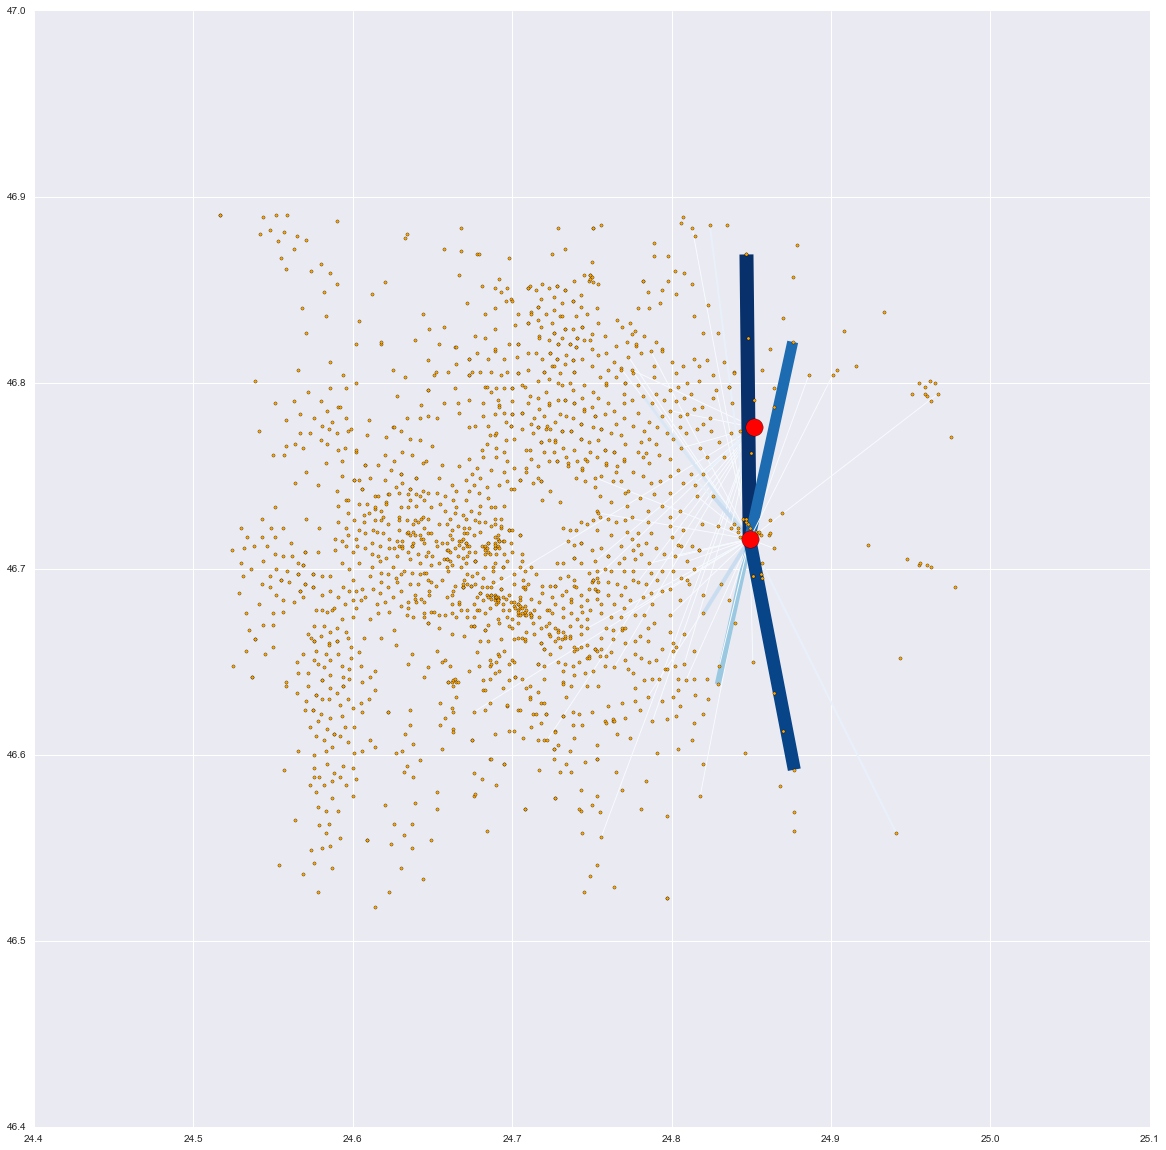

In [180]:
#https://networkx.github.io/documentation/latest/reference/generated/networkx.classes.function.get_node_attributes.html#networkx.classes.function.get_node_attributes
#create two separate dicts of lat and long, pulled from the node attributes
loc_dictlat = nx.get_node_attributes(OG,'lat')
loc_dictlong = nx.get_node_attributes(OG, 'long')

#construct pos dict, by calling from the above dicts, based on the node index ID, the respective lats and longs
loc_dict = {}
for node_index in OG.nodes():
    loc_dict[node_index] = (loc_dictlat[node_index]), (loc_dictlong[node_index])

plt.figure(figsize=(20,20))
edge_flowdict = nx.get_edge_attributes(OG,'flow')
edge_flow=[]
for index in OG.edges():
    edge_flow.append(edge_flowdict[index]) 
    
edge_flow_big = []
for index in OG.edges():
    edge_flow_big.append(edge_flowdict[index]*10) 
    

nx.draw_networkx_edges(OG, pos=loc_dict, width = edge_flow, edge_color=edge_flow, edge_cmap=plt.cm.Blues)
nx.draw_networkx_nodes(OG, pos=loc_dict, node_size = 10, node_color = "Orange")
nx.draw_networkx_nodes(OG, pos=loc_dict, nodelist = list_nodes)

In [184]:
#Destination charts
#create nodes of all cell towers
DG = nx.Graph()
keys = ['flow']
i = 0
for row in nodes_df.itertuples(index=False):
    i +=1
    DG.add_node(row[3], ID = row[3], lat = row[0], long = row[1]) 

DG.node[1649]
nx.number_of_nodes(DG)

1711

In [186]:
# Add edges to the graph here
i=0
for row in df_PND_xy2.itertuples(index=False):
    i +=1
    DG.add_edge(row[0],row[1],flow=row[2])

nx.number_of_edges(DG)
# nx.edges(RG)



44

In [4]:
#https://networkx.github.io/documentation/latest/reference/generated/networkx.classes.function.get_node_attributes.html#networkx.classes.function.get_node_attributes
#create two separate dicts of lat and long, pulled from the node attributes
loc_dictlat = nx.get_node_attributes(DG,'lat')
loc_dictlong = nx.get_node_attributes(DG, 'long')

#construct pos dict, by calling from the above dicts, based on the node index ID, the respective lats and longs
loc_dict = {}
for node_index in DG.nodes():
    loc_dict[node_index] = (loc_dictlat[node_index]), (loc_dictlong[node_index])

plt.figure(figsize=(20,20))
edge_flowdict = nx.get_edge_attributes(DG,'flow')
edge_flow=[]
for index in DG.edges():
    edge_flow.append(edge_flowdict[index]) 
    
edge_flow_big = []
for index in DG.edges():
    edge_flow_big.append(edge_flowdict[index]*10) 
    

nx.draw_networkx_edges(DG, pos=loc_dict, width = edge_flow, edge_color=edge_flow, edge_cmap=plt.cm.Reds)
nx.draw_networkx_nodes(DG, pos=loc_dict, node_size = 10, node_color = "Purple")
nx.draw_networkx_nodes(DG, pos=loc_dict, nodelist = list_nodes, node_color = "Blue")
plt.savefig("path.png")

NameError: name 'DG' is not defined